In [ ]:
 II. Swarm Behaviour Research Case Study
The SwarmyAI Hub is currently engaged in research studies to investigate behavioural pattern of swarms in their habitat. A typical swarm exhibit a "flocking" or "non-flocking" pattern in their movement from one place to another. In addition to this individual movement style, while in a group, in their movement pattern may be aligned or not.

As urgency demands in Swarmy's next publication, the hub requires your service as a ML Engineer to develop predictive model to determine to the movement pattern of some swarms that are yet to be categorised based on their flocking or non-flocking movement pattern only. You have been provided with previously categorized and yet to dataset of the swarm movement pattern. Based on this, you are require to:-

perform descriptive statistics, EDA and data preprocessing (if needed)
build a baseline (simple) model
explore II other hyperparameterized models
evaluate the performance of your best model on the test dataset using appropriate metric
visualize and interprete the confusion matrix of your class label prediction on the test dataset
Dataset Attribute Information: The attributes are xm, ym as the (X,Y) position of each boid, xVeln, yVeln as the velocity vector, xAm, yAm as the alignment vector, xSm, ySm as the separation vector, xCm, yCm as the cohesion vector, nACm as the number of boids in the radius of Alignment/Cohesion, and nSm as the number of boids in the radius of Separation. The class label is 1 - flocking and 0 - non-flocking



In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("../../swarm_test_data.csv")
df2=pd.read_csv("../../swarm_train_data.csv")

C:\Users\Marcus Ojaruega\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,-310.36,94.44,-3.49,-3.04,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.20,-5.30,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,875.60,645.34,-0.32,8.96,-0.04,1.00,0.00,0.00,-0.04,1.00,...,0.15,9.21,0.02,1.00,0.00,0.00,0.02,1.00,15,5
2,257.97,650.78,6.74,6.57,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.17,14.59,0.00,1.00,0.00,0.00,0.00,0.00,3,0
3,995.13,236.26,-0.76,-4.47,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.37,-2.95,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,-782.80,-163.54,12.69,13.12,-0.19,0.98,0.00,0.00,0.17,-2.67,...,9.68,-1.86,0.69,0.73,0.00,0.00,2.04,-1.74,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,-1400.85,-198.91,-7.46,-2.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.58,-7.05,-0.33,-0.94,0.00,0.00,-0.10,-0.99,3,1
5999,-535.60,-583.25,-11.99,2.31,-0.88,0.48,1.02,1.53,1.25,-2.37,...,-12.36,8.69,0.84,0.55,-3.36,0.43,2.58,0.71,112,15
6000,973.72,110.21,-1.51,-8.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-4.58,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0
6001,1073.24,-844.54,-0.31,8.48,-0.04,1.00,0.00,0.00,-0.04,1.00,...,-0.19,9.33,-0.02,1.00,0.00,0.00,-0.02,1.00,11,2


In [5]:
df2

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-489.28,-658.11,2.51,3.28,0.00,0.00,-0.26,0.35,0.93,-0.37,...,-4.17,0.00,0.00,0.33,0.29,-0.87,-0.50,112,40,1
1,-540.61,-670.93,-1.02,-4.76,0.00,0.00,-0.06,0.44,0.24,-0.97,...,-4.43,0.00,0.00,-0.15,0.41,-0.46,-0.89,112,9,1
2,379.83,-521.18,1.86,7.31,0.00,0.00,0.00,0.00,0.00,0.00,...,1.33,0.00,0.00,0.00,0.00,0.00,0.00,4,0,1
3,888.21,-146.53,-2.67,-18.10,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.19,0.00,0.00,0.00,0.00,0.00,0.00,3,1,0
4,-452.43,-632.15,2.66,-2.63,0.00,0.00,-0.12,0.42,0.01,-1.00,...,2.54,0.00,0.00,0.00,0.00,-1.00,-0.10,112,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,-574.72,-176.30,-5.15,-5.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-8.51,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
18009,-192.91,-997.61,5.70,-0.92,-0.14,-0.29,0.00,0.00,0.19,0.25,...,-2.06,-0.18,-0.27,0.00,0.00,-0.10,0.04,0,0,0
18010,273.54,841.54,-4.74,-5.54,-0.73,-0.69,0.00,0.00,0.51,-0.86,...,5.16,-0.95,0.32,0.00,0.00,-0.86,0.51,6,1,1
18011,1096.38,-270.36,-6.87,-0.65,-0.56,0.03,0.00,0.00,-0.32,0.05,...,-0.18,-0.56,-0.04,0.00,0.00,-0.32,0.03,71,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set,test_set=train_test_split(df2,test_size=0.3,random_state=42)

In [8]:
train_set

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
1126,242.09,936.45,1.80,7.11,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,3,0,1
12154,307.56,-982.01,1.24,8.23,-0.22,1.02,0.00,0.00,0.00,0.00,...,11.46,-0.26,1.01,0.00,0.00,0.00,0.00,14,0,1
17678,1134.89,-417.73,-0.11,-9.08,0.75,-0.66,-1.89,-2.81,2.38,-1.23,...,-13.42,0.82,-0.57,0.07,-1.84,2.66,0.30,102,9,1
11625,-1126.75,368.13,5.52,10.13,0.00,1.00,0.00,0.00,0.00,0.00,...,7.82,0.00,1.00,-0.36,3.22,0.00,0.00,34,0,0
14900,407.36,-63.17,-9.94,-4.02,0.00,0.00,0.00,0.00,0.00,0.00,...,-15.43,0.00,0.00,0.00,0.00,0.00,0.00,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-370.63,119.81,-7.15,-2.05,-0.95,-0.30,0.00,0.00,-0.98,-0.20,...,1.93,-0.96,0.27,0.00,0.00,-0.96,0.27,1,0,1
11964,1003.81,365.05,2.39,-4.52,-0.01,-0.10,0.00,0.00,0.26,-0.19,...,-2.96,0.01,-0.03,0.00,0.00,0.00,0.00,4,1,0
5390,-463.52,-671.07,-1.26,-1.85,0.00,0.00,0.37,0.24,-0.94,-0.34,...,-2.24,0.00,0.00,0.14,-0.42,-0.28,0.96,112,35,1
860,538.13,-557.30,4.66,-12.75,-1.00,-1.00,0.00,0.00,0.00,0.00,...,5.20,-1.00,0.00,-12.87,9.50,0.00,0.00,11,0,0


In [9]:
test_set

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
4168,-43.37,125.84,5.21,-9.36,0.00,0.0,0.00,0.00,0.24,-0.21,...,-7.19,0.00,0.0,0.00,0.00,-0.21,-0.24,8,0,0
10018,1308.78,-128.67,6.20,-7.17,0.00,0.0,0.00,0.00,0.00,0.00,...,-3.43,0.00,0.0,0.00,0.00,0.00,0.00,6,0,0
4903,928.24,-157.45,-1.20,-7.07,0.00,0.0,0.00,0.00,0.00,0.00,...,-2.33,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0
5151,-459.53,-662.63,-0.17,-2.02,0.00,0.0,0.29,0.33,-0.83,-0.56,...,-3.08,0.00,0.0,0.31,-0.31,-0.56,0.83,112,50,1
10610,-79.14,24.15,11.96,-10.14,-1.00,0.0,0.00,0.00,0.00,0.00,...,-7.44,-1.00,-1.0,0.00,0.00,0.00,0.00,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,948.24,-712.19,-2.13,-0.86,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.70,0.00,0.0,0.00,0.00,0.00,0.00,18,0,0
8508,1002.56,-881.16,-0.33,9.06,-0.04,1.0,0.00,0.00,-0.04,1.00,...,7.31,-0.02,1.0,0.00,0.00,-0.02,1.00,14,4,1
6260,-834.07,-829.71,-18.06,-7.30,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.38,0.00,0.0,0.00,0.00,0.00,0.00,29,0,0
8358,-1060.11,490.66,-0.15,17.26,0.00,1.0,-0.50,3.20,0.00,0.00,...,15.98,0.00,1.0,0.00,0.00,0.00,0.00,18,0,0


In [10]:
X=train_set.loc[:,"xVel1"]

In [11]:
y=train_set.iloc[:,-1]

In [12]:
X

1126     1.80
12154    1.24
17678   -0.11
11625    5.52
14900   -9.94
         ... 
11284   -7.15
11964    2.39
5390    -1.26
860      4.66
15795   -0.98
Name: xVel1, Length: 12609, dtype: float64

In [13]:
X.shape

(12609,)

In [14]:
y

1126     1
12154    1
17678    1
11625    0
14900    0
        ..
11284    1
11964    0
5390     1
860      0
15795    0
Name: Class , Length: 12609, dtype: int64

In [15]:
X=X.values

In [16]:
X=X.reshape(-1,1)

## Baseline Model 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier()  # INSTATIATING THE MODEL

In [19]:
knn.fit(X,y) #TRAINING THE MODEL

KNeighborsClassifier()

In [20]:
knn.score(X,y) 

0.8152906653977318

In [21]:
knn.predict([[11.96]]) #PREDICTING IF THE SWARM WILL FLOCK

array([0], dtype=int64)

In [22]:
knn.predict([[-0.98]])

array([0], dtype=int64)

In [23]:
knn.predict([[-3.49]])

array([0], dtype=int64)

In [24]:
X1=train_set.loc[:,["x3","xA2","xVel2","nAC2","nS2"]]

In [25]:
X1

,x3,xA2,xVel2,nAC2,nS2
1126,890.15,0.00,-2.76,5,0
12154,-665.02,-0.10,-0.96,9,0
17678,1221.42,0.78,11.22,92,2
11625,-718.48,0.00,3.32,16,1
14900,159.69,0.00,-0.12,31,0
...,...,...,...,...,...
11284,635.72,-0.82,-7.38,1,0
11964,-445.96,0.01,-1.81,2,0
5390,-1063.13,0.00,3.62,112,23
860,46.29,-1.00,2.02,26,1


In [26]:
knn1=KNeighborsClassifier(10,metric="euclidean",p=5)
knn1.fit(X1,y)
knn1.score(X1,y)

0.8042667935601554

## FIRST HYPERPARAMETISED MODEL

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model=LogisticRegression()
log_model.fit(X,y)
log_model.score(X,y)

0.6075818859544769

In [31]:
log_model1=LogisticRegression()
log_model1.fit(X1,y)
log_model1.score(X1,y)

0.6540566262193671

# SECOND HYPERPARAMETISED MODEL

In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
dtc.fit(X,y)

DecisionTreeClassifier()

In [36]:
dtc.score(X,y)

0.8514553096994211

In [37]:
dtc1=DecisionTreeClassifier()

In [38]:
dtc1.fit(X1,y)

DecisionTreeClassifier()

In [39]:
dtc1.score(X1,y)

1.0

# predicting the best model

In [40]:
from sklearn.model_selection import cross_val_score

In [74]:
scores_knn=cross_val_score(knn,X,y,cv=6)
scores

array([0.76688868, 0.75547098, 0.75214082, 0.75107092, 0.77058544,
       0.75487863])

In [75]:
scores_knn.mean()

0.7585059098464432

In [76]:
scores_knn1=cross_val_score(knn1,X1,y,cv=6)
scores1

array([0.59276879, 0.61988582, 0.59372027, 0.60161828, 0.62779629,
       0.60828177])

In [78]:
scores_knn1.mean()

0.7393918033685197

In [79]:
scores_log_model=cross_val_score(log_model,X,y,cv=6)
scores_log_model

array([0.59276879, 0.61988582, 0.59372027, 0.60161828, 0.62779629,
       0.60828177])

In [80]:
scores_log_model.mean()

0.6073452026906977

In [81]:
scores_log_model1=cross_val_score(log_model1,X1,y,cv=6)
scores_log_model1

array([0.63701237, 0.66508088, 0.68981922, 0.64445502, 0.63541171,
       0.66349357])

In [82]:
scores_log_model.mean()

0.6073452026906977

In [83]:
scores_dtc=cross_val_score(dtc,X,y,cv=6)
scores_dtc

array([0.80209324, 0.79448145, 0.79781161, 0.78391242, 0.81770585,
       0.79961923])

In [84]:
scores_dtc.mean()

0.7992706341187718

In [85]:
scores_dtc1=cross_val_score(dtc1,X1,y,cv=6)
scores_dtc1

array([0.98334919, 0.97526166, 0.97764034, 0.97382199, 0.97810566,
       0.97905759])

In [86]:
scores_dtc1.mean()

0.9778727390774756

# EVALUATION OF THE BEST MODEL ON THE TEST DATASETS

In [132]:
df2

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-489.28,-658.11,2.51,3.28,0.00,0.00,-0.26,0.35,0.93,-0.37,...,-4.17,0.00,0.00,0.33,0.29,-0.87,-0.50,112,40,1
1,-540.61,-670.93,-1.02,-4.76,0.00,0.00,-0.06,0.44,0.24,-0.97,...,-4.43,0.00,0.00,-0.15,0.41,-0.46,-0.89,112,9,1
2,379.83,-521.18,1.86,7.31,0.00,0.00,0.00,0.00,0.00,0.00,...,1.33,0.00,0.00,0.00,0.00,0.00,0.00,4,0,1
3,888.21,-146.53,-2.67,-18.10,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.19,0.00,0.00,0.00,0.00,0.00,0.00,3,1,0
4,-452.43,-632.15,2.66,-2.63,0.00,0.00,-0.12,0.42,0.01,-1.00,...,2.54,0.00,0.00,0.00,0.00,-1.00,-0.10,112,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,-574.72,-176.30,-5.15,-5.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-8.51,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
18009,-192.91,-997.61,5.70,-0.92,-0.14,-0.29,0.00,0.00,0.19,0.25,...,-2.06,-0.18,-0.27,0.00,0.00,-0.10,0.04,0,0,0
18010,273.54,841.54,-4.74,-5.54,-0.73,-0.69,0.00,0.00,0.51,-0.86,...,5.16,-0.95,0.32,0.00,0.00,-0.86,0.51,6,1,1
18011,1096.38,-270.36,-6.87,-0.65,-0.56,0.03,0.00,0.00,-0.32,0.05,...,-0.18,-0.56,-0.04,0.00,0.00,-0.32,0.03,71,0,1


In [53]:
test_set

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
4168,-43.37,125.84,5.21,-9.36,0.00,0.0,0.00,0.00,0.24,-0.21,...,-7.19,0.00,0.0,0.00,0.00,-0.21,-0.24,8,0,0
10018,1308.78,-128.67,6.20,-7.17,0.00,0.0,0.00,0.00,0.00,0.00,...,-3.43,0.00,0.0,0.00,0.00,0.00,0.00,6,0,0
4903,928.24,-157.45,-1.20,-7.07,0.00,0.0,0.00,0.00,0.00,0.00,...,-2.33,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0
5151,-459.53,-662.63,-0.17,-2.02,0.00,0.0,0.29,0.33,-0.83,-0.56,...,-3.08,0.00,0.0,0.31,-0.31,-0.56,0.83,112,50,1
10610,-79.14,24.15,11.96,-10.14,-1.00,0.0,0.00,0.00,0.00,0.00,...,-7.44,-1.00,-1.0,0.00,0.00,0.00,0.00,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,948.24,-712.19,-2.13,-0.86,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.70,0.00,0.0,0.00,0.00,0.00,0.00,18,0,0
8508,1002.56,-881.16,-0.33,9.06,-0.04,1.0,0.00,0.00,-0.04,1.00,...,7.31,-0.02,1.0,0.00,0.00,-0.02,1.00,14,4,1
6260,-834.07,-829.71,-18.06,-7.30,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.38,0.00,0.0,0.00,0.00,0.00,0.00,29,0,0
8358,-1060.11,490.66,-0.15,17.26,0.00,1.0,-0.50,3.20,0.00,0.00,...,15.98,0.00,1.0,0.00,0.00,0.00,0.00,18,0,0


In [100]:
X2=test_set.loc[:,["xVel1"]]

In [101]:
X2

,xVel1
4168,5.21
10018,6.20
4903,-1.20
5151,-0.17
10610,11.96
...,...
15667,-2.13
8508,-0.33
6260,-18.06
8358,-0.15


In [102]:
X2

,xVel1
4168,5.21
10018,6.20
4903,-1.20
5151,-0.17
10610,11.96
...,...
15667,-2.13
8508,-0.33
6260,-18.06
8358,-0.15


In [103]:
y_mod=dtc.predict(X2)

In [104]:
y_mod

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [105]:
y_mod.shape

(5404,)

In [106]:
y_mod=y_mod.reshape(-1,1)

In [107]:
y_mod

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [108]:
y_mod.shape

(5404, 1)

In [109]:
dtc2=DecisionTreeClassifier()
dtc2.fit(X2,y_mod)
dtc2.score(X2,y_mod)

1.0

In [138]:
## Same evaluation using the swarm test dataset

In [139]:
df1

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,-310.36,94.44,-3.49,-3.04,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.20,-5.30,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,875.60,645.34,-0.32,8.96,-0.04,1.00,0.00,0.00,-0.04,1.00,...,0.15,9.21,0.02,1.00,0.00,0.00,0.02,1.00,15,5
2,257.97,650.78,6.74,6.57,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.17,14.59,0.00,1.00,0.00,0.00,0.00,0.00,3,0
3,995.13,236.26,-0.76,-4.47,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.37,-2.95,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,-782.80,-163.54,12.69,13.12,-0.19,0.98,0.00,0.00,0.17,-2.67,...,9.68,-1.86,0.69,0.73,0.00,0.00,2.04,-1.74,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,-1400.85,-198.91,-7.46,-2.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.58,-7.05,-0.33,-0.94,0.00,0.00,-0.10,-0.99,3,1
5999,-535.60,-583.25,-11.99,2.31,-0.88,0.48,1.02,1.53,1.25,-2.37,...,-12.36,8.69,0.84,0.55,-3.36,0.43,2.58,0.71,112,15
6000,973.72,110.21,-1.51,-8.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-4.58,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0
6001,1073.24,-844.54,-0.31,8.48,-0.04,1.00,0.00,0.00,-0.04,1.00,...,-0.19,9.33,-0.02,1.00,0.00,0.00,-0.02,1.00,11,2


In [140]:
X3=df1.loc[:, "xVel1"]
X3=X3.values
X3=X3.reshape(-1,1)

In [141]:
X3.shape

(6003, 1)

In [148]:
y_pd=dtc.predict(X3)
y_pd

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [149]:
y_pd.shape

(6003,)

In [150]:
dtc3=DecisionTreeClassifier()
dtc3.fit(X3,y_pd)
dtc3.score(X3,y_pd)

1.0

In [151]:
scores_test_datasets=cross_val_score(dtc3,X3,y_pd,cv=6)
scores_test_datasets

array([0.96003996, 0.96403596, 0.96703297, 0.958     , 0.962     ,
       0.958     ])

In [152]:
scores_test_datasets.mean()

0.9615181485181484

# CONFUSION MATRIX

In [153]:
from sklearn.metrics import confusion_matrix

In [111]:
y_test=test_set.iloc[:,-1]
y_test


4168     0
10018    0
4903     0
5151     1
10610    0
        ..
15667    0
8508     1
6260     0
8358     0
3297     0
Name: Class , Length: 5404, dtype: int64

In [112]:
y_mod

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [113]:
confusion_matrix=confusion_matrix(y_test, y_mod) # confusion matrix for test_set 
print(confusion_matrix)

[[2301  333]
 [ 663 2107]]


## 2301 = True Positive
## 333=  False Positive
## 663= False Negative
## 2107= True Negative

In [115]:
import matplotlib.pyplot as plt

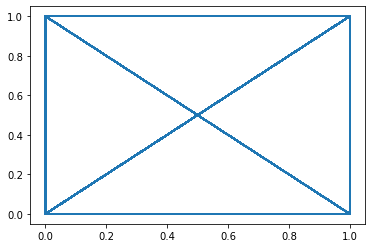

In [116]:
plt.plot(y_test,y_mod)

In [155]:
y_test1=df1.iloc[:,-1]
y_test1

0        0
1        5
2        0
3        0
4        0
        ..
5998     1
5999    15
6000     0
6001     2
6002     0
Name: nS200, Length: 6003, dtype: int64

In [156]:
confusion_matrix=confusion_matrix(y_test1, y_pd) # confusion matrix for swarm test dataset
print(confusion_matrix)

[[2683 1436    0 ...    0    0    0]
 [ 529  352    0 ...    0    0    0]
 [ 100  182    0 ...    0    0    0]
 ...
 [   0    1    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]]


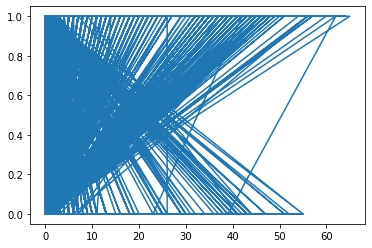

In [157]:
plt.plot(y_test1,y_pd)